# Stroke Predicton

##  Import Python Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

## Import Dataset

In [2]:
dataframe = pd.read_csv('healthcare-dataset-stroke-data.csv',index_col=0)
print(dataframe.head(5))

       gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
9046     Male  67.0             0              1          Yes        Private   
51676  Female  61.0             0              0          Yes  Self-employed   
31112    Male  80.0             0              1          Yes        Private   
60182  Female  49.0             0              0          Yes        Private   
1665   Female  79.0             1              0          Yes  Self-employed   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
id                                                                      
9046           Urban             228.69  36.6  formerly smoked       1  
51676          Rural             202.21   NaN     never smoked       1  
31112          Rural             105.92  32.5     never smoked       1  
60182          Urban             171.23  34.4           smokes       1  
1

Attribute Information
* 1) id: unique identifier p
* 2) gender: "Male", "Female" or "Other"
* 3) age: age of the patient
* 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* 6) ever_married: "No" or "Yes"
* 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* 8) Residence_type: "Rural" or "Urban"
* 9) avg_glucose_level: average glucose level in blood
* 10) bmi: body mass index
* 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* 12) stroke: 1 if the patient had a stroke or 0 if not
* Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### Data Quality

In [70]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [3]:
#Ver se existe alguma row duplicada no dataset
dataframe[dataframe.duplicated() == True]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,


In [4]:
#ver missing values dentro do dataset
dataframe.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Exploration Data

In [68]:
cols = ['age','avg_glucose_level','bmi']
np.round(dataframe[cols].describe(), 2).T[['mean', 'std', 'min', 'max',"25%","50%","75%"]]

,mean,std,min,max,25%,50%,75%
age,43.23,22.61,0.08,82.00,25.00,45.00,61.00
avg_glucose_level,106.15,45.28,55.12,271.74,77.24,91.88,114.09
bmi,28.89,7.85,10.30,97.60,23.50,28.10,33.10


AxesSubplot(0.125,0.125;0.775x0.755)


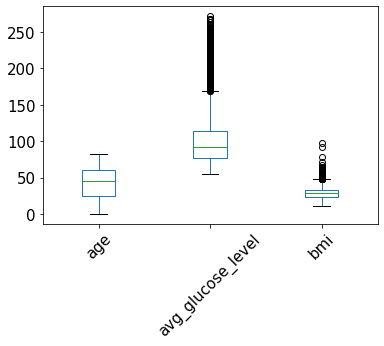

In [7]:
boxplot_1 = dataframe.boxplot(column=['age','avg_glucose_level','bmi'], 
                            grid=False, rot=45, fontsize=15)
print(boxplot_1)

### Stroke

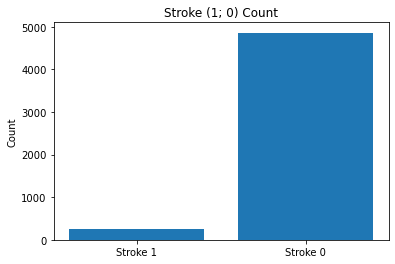

In [8]:
stroke_1 = dataframe[dataframe['stroke']==1]
stroke_1 = stroke_1['stroke'].count()
stroke_0 = dataframe[dataframe['stroke']==0]
stroke_0 = stroke_0['stroke'].count()

objects = ('Stroke 1', 'Stroke 0')
Count = [stroke_1, stroke_0]
y_pos = np.arange(len(objects))

plt.bar(objects, Count)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Stroke (1; 0) Count')

plt.show()

In [9]:
print("Stroke Probability:", round(stroke_1/(stroke_1+stroke_0)*100,2),"%")

Stroke Probability: 4.87 %


### Gender

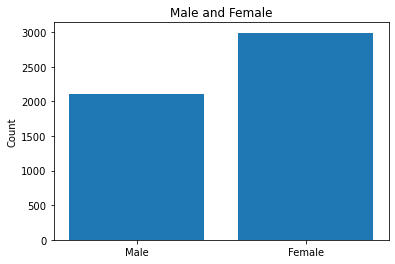

In [10]:
gender_m = dataframe[dataframe['gender']=="Male"]
gender_m = gender_m['gender'].count()
gender_f = dataframe[dataframe['gender']=="Female"]
gender_f = gender_f['gender'].count()

objects = ('Male', 'Female')
Count = [gender_m, gender_f]
y_pos = np.arange(len(objects))

plt.bar(objects, Count)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Male and Female')

plt.show()

In [11]:
print("Male Percentage:", round(gender_m/(gender_m+gender_f)*100,2),"%")
print("Female Percentage:", round(gender_f/(gender_m+gender_f)*100,2),"%")

Male Percentage: 41.4 %
Female Percentage: 58.6 %


### Gender - Stroke

In [19]:
gender_m = dataframe[dataframe['gender']=="Male"]
gender_m_1 = gender_m[gender_m['stroke']==1]
gender_m_1 = gender_m_1['gender'].count()
gender_m = gender_m['gender'].count()
gender_f = dataframe[dataframe['gender']=="Female"]
gender_f_1 =gender_f[gender_f['stroke']==1]
gender_f_1 = gender_f_1['gender'].count()
gender_f = gender_f['gender'].count()
p_male_stroke = round(gender_m_1/gender_m*100,2)
p_female_stroke = round(gender_f_1/gender_f*100,2)


fig = go.Figure(data=[go.Table(
    header=dict(values=['Gender', 'Total', 'Stroke','% Stroke'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['Male', 'Female'], # 1st column
                       [gender_m, gender_f], # 2nd column
                       [gender_m_1, gender_f_1], # 3nd column
                       [str(p_male_stroke)+" %", str(p_female_stroke)+" %"], # 4nd column
                      ], 
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))])

fig.update_layout(width=500, height=300)
fig.show()

### Age

### Age - Stroke

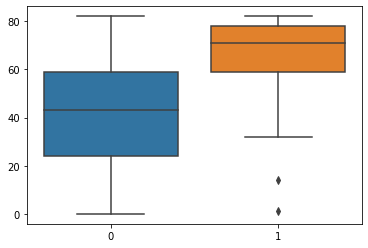

In [54]:
def bpl(dataframe, col, y):
    var_1 = dataframe[dataframe[y]==1]
    var_1 = var_1[col].to_numpy()
    var_0 = dataframe[dataframe[y]==0]
    var_0 = var_0[col].to_numpy()
    all_arr = [[var_0],
               [var_1]]
    return sns.boxplot(data=all_arr)
    


bpl(dataframe, "age", "stroke")

### Avg_glucose_level - Stroke

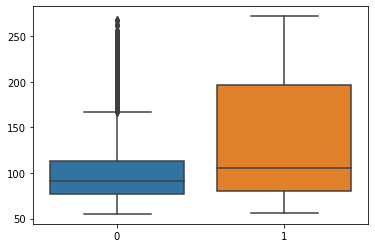

In [56]:
bpl(dataframe, "avg_glucose_level", "stroke")

### Bmi - Stroke

<AxesSubplot:>

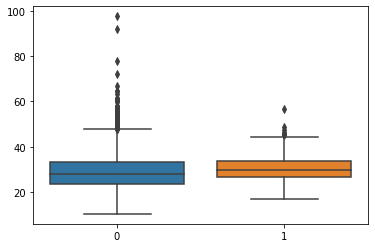

In [57]:
bpl(dataframe, "bmi", "stroke")

## Correlation

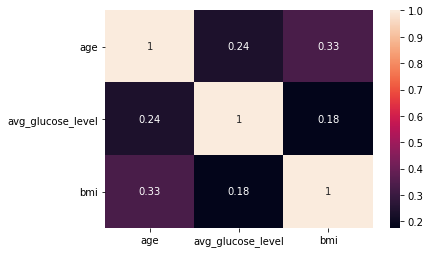

In [67]:
corrMatrix = dataframe[df.columns.difference(['stroke'])].corr(method="pearson")
sns.heatmap(corrMatrix, annot=True)
plt.show()

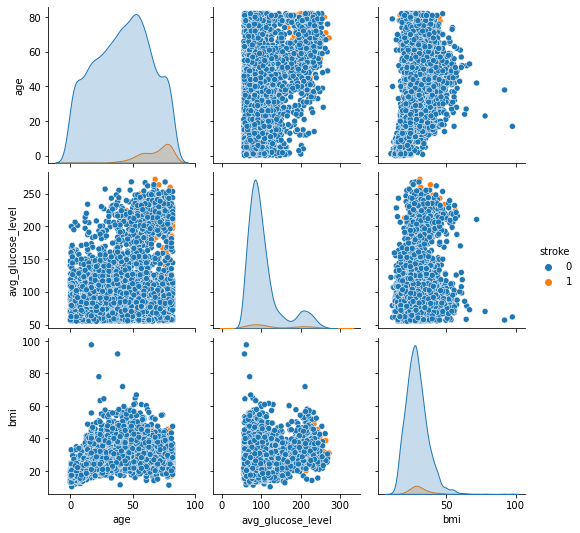

In [63]:
df = dataframe[["age", "avg_glucose_level","bmi","stroke"]]
sns.pairplot(df, hue="stroke")